# Labb 2
## Pichu vs Pikachu
---
Syftet med den här laborationen är att använda verktygen du lärt dig i Python för att implementera en förenklad maskininlärningsalgoritm. I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. Du ska skapa en algoritm som baserat på den givna datan kunna avgöra om en ny datapunkt ska klassificeras som Pichu eller Pikachu.

### Grunduppgift
Följ detta flödesschema för att bygga den grundläggande algoritmen

![flödesschema](pikapichuflodesschema.png)

- (25,32), (24.2,31.5), (22,34), (20.5,34)

Facit på givna testdatan:
- Sample with (width, height): (25, 32) classified as Pikachu
- Sample with (width, height): (24.2, 31.5) classified as Pikachu
- Sample with (width, height): (22, 34) classified as Pikachu
- Sample with (width, height): (20.5, 34) classified as Pichu

### Uppgifter
Gör dessa uppgifter när du klassificerat testdatan korrekt.
- Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.
- Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive klass går in i varandra. Nu ska du istället välja de tio närmaste punkterna till din testpunkt. Den klass testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna.


In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import random

# 1. LÄS IN DATAN I LÄMPLIG DATASTRUKTUR

with open("datapoints.txt", "r") as file:
    datapoints = file.read()

removed_lines = datapoints.replace('\n', ', ')              # tar bort "\n" och ersätter med ","
splitted = removed_lines.split(', ')                        # skapar en lista med brytpunkt ","
all_samples = splitted[4:]                                  # tar bort titel

while("") in all_samples:                                   # tar bort tomma element i listan
    all_samples.remove("")

pikachus = []
pichus = []
pichuwidths = []
pichuheights = []
pikawidths = []
pikaheights = []

for index in range(0, len(all_samples)):
    
    if index % 3 == 0:                                                              # stannar loopen vid var tredje element
        
        if all_samples[index+2] == '0':                                             # kollar om tredje elementet är "0", alltså Pichu
            pichuwidths.append(float(all_samples[index]))                           # lägger till bredd (som är vid index 0)
            pichuheights.append(float(all_samples[index+1]))                        # lägger till höjd (som är vid index 1)
            pichus.append([float(all_samples[index]), float(all_samples[index+1])]) # gör en 2d lista med både bredd och höjd
        
        else:
            pikawidths.append(float(all_samples[index]))                            # samma som ovan, fast för Pikachu
            pikaheights.append(float(all_samples[index+1]))
            pikachus.append([float(all_samples[index]), float(all_samples[index+1])])
            
print(all_samples)
print(pikachus)
print(pichus)

['21.959384499160468', '31.23956701424158', '0', '23.63591632187622', '36.46821490673444', '1', '17.714056417303343', '31.44170391314962', '0', '21.78020031891186', '33.213397759738264', '1', '25.20630552859312', '36.558816149350534', '1', '19.332572350434354', '32.25325633655492', '0', '24.73645685241186', '35.33291181124776', '1', '23.79257560586339', '38.10372825362463', '1', '24.557612968127465', '36.73144402805611', '1', '20.191281253428173', '35.06966921830237', '0', '25.813562951888365', '35.561029988644336', '1', '24.923378667802954', '34.463907946680294', '1', '25.311244044578427', '34.117212558131975', '1', '22.819091361866796', '34.25516433025548', '1', '19.639358214988224', '34.56117030001663', '0', '18.341233265627693', '31.399261188293124', '0', '22.723629043769336', '34.83845262048311', '1', '25.82936770950206', '33.16210202637511', '1', '20.23890182459327', '32.78945132868386', '0', '17.905128921789093', '28.88813385482529', '0', '24.385289647525166', '37.33566905738772

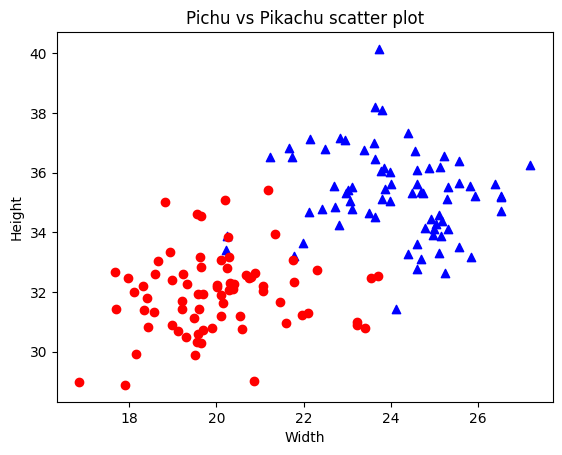

In [11]:
# 2. PLOTTA DATA

def plot(x =pikawidths, y =pikaheights, z =pichuwidths, q =pichuheights):
    plt.figure(0)
    plt.title("Pichu vs Pikachu scatter plot")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.scatter(x, y, c='b', marker='^')
    plt.scatter(z, q, c='r')
plot()

In [14]:
# 3. LÄS IN TESTDATA

with open("testpoints.txt", "r") as file:
    testpoints = file.readlines()

dirtiest_tests = []
for test in testpoints:
    dirtiest_tests.append(test.replace('\n', '') and test.replace(' ', ''))     # byter radbyten och mellanslag mot ingenting, och lägger dem i lista

dirty_tests = dirtiest_tests[1:]                                                # tar bort titel
string_tests = [sub[3:-2] for sub in dirty_tests]                               # tar bort numrering + "()" (https://www.geeksforgeeks.org/python-remove-last-character-in-list-of-strings/)
clean_tests = [sub.split(',') for sub in string_tests]                          # gör en 2d lista med både bredd och höjd
print(clean_tests)

[['25', '32'], ['24.2', '31.5'], ['22', '34'], ['20.5', '34']]


It's a pikachu!
It's a pikachu!
It's a pikachu!
It's a pichu!


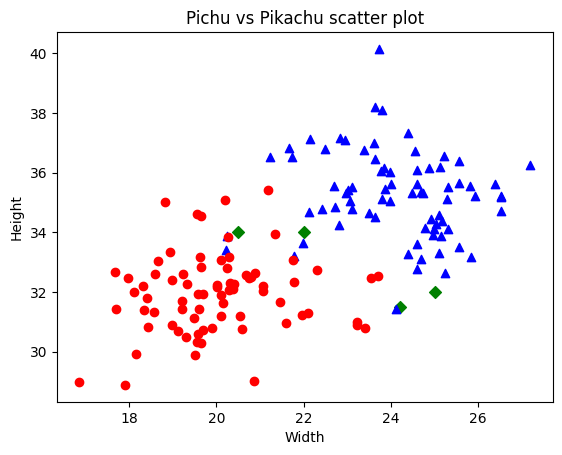

In [15]:
# 4. BERÄKNA AVSTÅND och HITTA NÄRMSTA POKEMON

def distance_calculator(testwidth, testheight):                               # 1. distance = sqrt((x2-x1)^2 + (y2-y1)^2) MEN: se kommentarer 2a och b
    pika_closest = []
    pichu_closest = []
    
    def w_h_pair_test(test_data):
        for data_pair in test_data:
            width = data_pair[0]
            height = data_pair[1]
            distance = np.sqrt((testwidth-width)**2 + (testheight-height)**2) # 2. sqrt() är onödig datakraft då det faktiska avståndet aldrig efterfrågas
            
            if test_data == pikachus:
                pika_closest.append(distance)
            else:
                pichu_closest.append(distance)
                
    w_h_pair_test(pikachus)
    w_h_pair_test(pichus)
    
    pika_closest = sorted(pika_closest)                                     # 3. Alla avstånd läggs till i listor och sorteras
    pichu_closest = sorted(pichu_closest)
    
    counter = 0
    for distances in range(0, 11):                                          # 4. Vi kollar de första 10 värdena i båda listorna och jämför dem
        if pika_closest[distances] < pichu_closest[distances]:
            counter += 1                                                    # 5. Därefter poängsätter vi den ena för att avgöra var punkten är närmst

    plt.figure(0)
    plt.scatter(testwidth, testheight, c='g', marker='D')
    
    if counter > 5:                                                         # 5b. Över 5 = pikachu
        result = "It's a pikachu!"
    
    else:                                                                   # 5c. Annars = pichu
        result = "It's a pichu!"
        
    return result


print(distance_calculator(25, 32))
print(distance_calculator(24.2, 31.5))
print(distance_calculator(22, 34))
print(distance_calculator(20.5, 34))

plot()

Welcome to PikChunary!
Please input width and height to see if it's a pichu or a pikachu.
The dimensions (25.0, 32.0) you entered suggests that...   ...It's a pikachu!


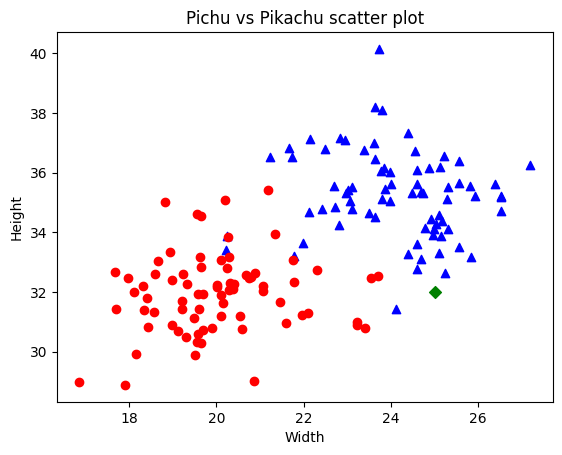

In [16]:
# 5. GÖR DEN TILL ANVÄNDARVÄNLIGT PROGRAM


print("Welcome to PikChunary!")
print("Please input width and height to see if it\'s a pichu or a pikachu.")

while True:
    try:
        input_width = float(input("Width: "))
        input_height = float(input("Height: "))
        print(f"The dimensions ({input_width}, {input_height}) you entered suggests that...   ...{distance_calculator(input_width, input_height)}")
        break
    except:
        print("Please enter only numbers.")

plot()


---
### Bonusuppgifter (frivilliga)
Dela in ursprungsdatan slumpmässigt så att:
- 100 är träningsdata (50 Pikachu, 50 Pichu)
- 50 är testdata (25 Pikachu, 25 Pichu)
- Beräkna noggranheten genom följande formel:
accuracy = (#TP+#TN)/(total)
där

![confusion matrix](labb2confmatrix.png)

Här har vi låtit Pikachu vara positiv och Pichu vara "icke-Pikachu" dvs negativ.
**Notera:** För varje testpunkt beräknar vi distansen till träningspunkterna
- Upprepa uppgift 3 och 4 tio gånger, plotta en graf över accuracy och rapportera medelaccuracy.


92.0

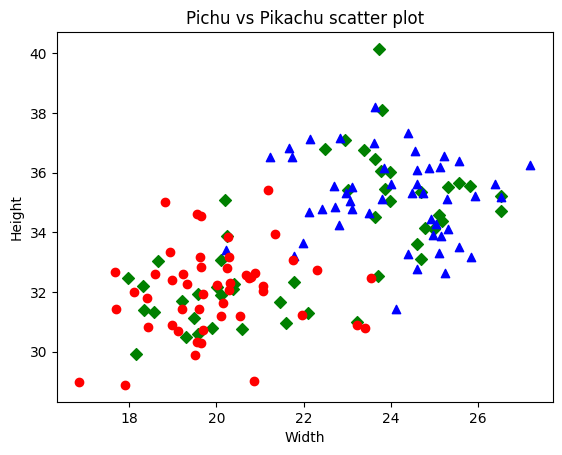

In [38]:
random.shuffle(pikachus)
random.shuffle(pichus)

pikachu_training_data = pikachus[:50]
pichu_training_data = pichus[:50]
new_test_data = pikachus[-25:] + pichus[-25:]

def accuracy_calculator(testdata, random_pikas, random_pichus):
    
    random_pika_width = [w[0] for w in random_pikas]
    random_pika_height = [h[1] for h in random_pikas]
    random_pichu_width = [w[0] for w in random_pichus]
    random_pichu_height = [h[1] for h in random_pichus]
    
    random_test_width = [w[0] for w in testdata]
    random_test_height = [h[1] for h in testdata]
    
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    
    for index in range(len(testdata)):
        distance_to_pika = np.sqrt((random_pika_width[index] - random_test_width[index])**2 + (random_pika_height[index] - random_test_height[index])**2)
        distance_to_pichu = np.sqrt((random_pichu_width[index] - random_test_width[index])**2 + (random_pichu_height[index] - random_test_height[index])**2)
        
        plt.figure(0)
        plt.scatter(random_test_width[index], random_test_height[index], c='g', marker='D')
    
        if distance_to_pika < distance_to_pichu:
            
            if [random_test_width[index], random_test_height[index]] in pikachus:
                tp += 1
            
            elif [random_test_width[index], random_test_height[index]] in pichus:
                fp += 1
            
        else:
            
            if [random_test_width[index], random_test_height[index]] in pichus:
                tn += 1
            
            elif [random_test_width[index], random_test_height[index]] in pikachus:
                fn += 1
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    #print(len(pika_closest))
    #print(len(pichu_closest))
    #print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    
    plot(random_pika_width, random_pika_height, random_pichu_width, random_pichu_height)
    
    #print(f"Accuracy: {accuracy}")
    return accuracy*100

accuracy_calculator(new_test_data, pikachu_training_data, pichu_training_data)

Average accuracy: 90.73%.


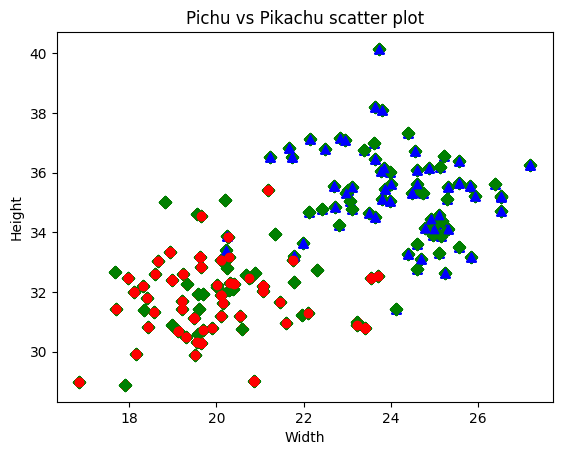

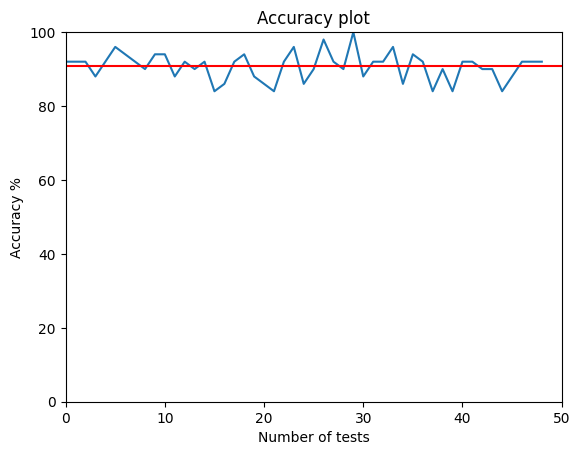

In [41]:
# PLOTTA ACCURACY

def accuracy_plotter():
    accuracy_list = []
    
    for i in range(1, 50):
        random.shuffle(pikachus)
        random.shuffle(pichus)

        pikachu_training_data = pikachus[:50]
        pichu_training_data = pichus[:50]
        new_test_data = pikachus[-25:] + pichus[-25:]
        accuracy_list.append(accuracy_calculator(new_test_data, pikachu_training_data, pichu_training_data))
    
    average_accuracy = sum(accuracy_list) / len(accuracy_list)
    
    print(f"Average accuracy: {average_accuracy:.2f}%.")
    
    plt.figure(1)
    plt.title("Accuracy plot")
    plt.xlabel("Number of tests")
    plt.ylabel("Accuracy %")
    plt.axis([0, 50, 0, 100])
    
    plt.plot(accuracy_list)
    plt.axhline(y=average_accuracy, color='r', linestyle='-')
    
    plt.show()

accuracy_plotter()

---
### Bedömning
Om du har fått någon kodsnutt från någon annan eller hittat i någon sida är det viktigt att du källhänvisar.
Skriv en kommentar bredvid koden som du har tagit.

**Godkänt**
- löst grunduppgift, samt övriga uppgifter på korrekt sätt
- koden är kommenterad med relevanta kommentarer
- variabelnamnen är bra valda
- gjort flera relevanta git commits

**Väl Godkänt**
- koden är enkel att följa
- koden är effektiv
- koden är välstrukturerad med lämpliga funktioner
- kommentarerna är datavetenskapligt korrekta
- löst samtliga uppgifter